In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
# import mpld3
from mpl_toolkits.mplot3d import Axes3D  # noqa
import pandas as pd

# mpld3.enable_notebook()
np = pd.np

df = pd.read_csv('../shared-resources/pointcloud.csv.gz', header=0, index_col=0)
# df.to_csv('../shared-resources/pointcloud.csv.gz', compression='gzip')
df = df.sample(1000).copy()
df.head(3)


,x,y,z
8858,0.032064,0.014326,0.016389
16783,0.035897,-0.013560,-0.004952
25572,-0.003051,-0.037112,0.031536


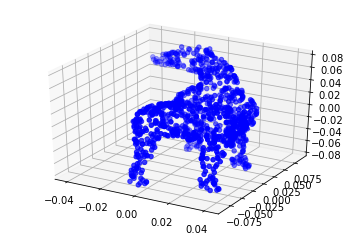

In [4]:
# do this in a jupyter console (or python console) for an interactive, rotatable plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(list(df.x), list(df.y), list(df.z), c='b', depthshade=True)
# mpld3.display()
plt.show()

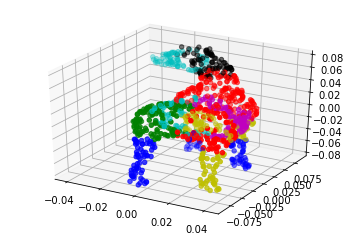

In [38]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='k-means++', n_clusters=8)
kmeans = kmeans.fit(df)
df['cluster_id'] = kmeans.predict(df)
colors = np.array(list('rgbkcmyr'))[df.cluster_id.values]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax = ax.scatter(df.x, df.y, df.z, c=colors, depthshade=True)
plt.show()

/Users/leey/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


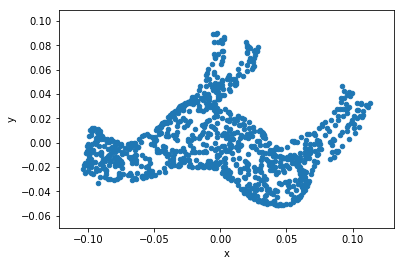

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df2d = pd.DataFrame(pca.fit_transform(df[['x','y','z']]), columns=list('xy'))
df2d.plot.scatter(x='x', y='y')
plt.legend()
plt.show()


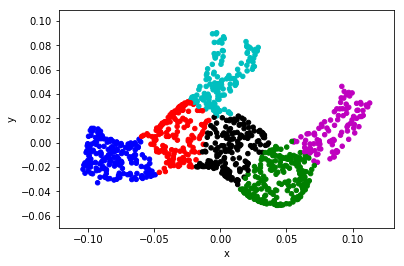

In [41]:
kmeans = KMeans(init='k-means++', n_clusters=6)
kmeans = kmeans.fit(df2d)
df2d['cluster_id'] = kmeans.predict(df2d)
df2d.plot.scatter(x='x', y='y', c=np.array(list('rgbkcmy'))[df2d.cluster_id.values])
plt.show()

In [75]:
from sklearn.manifold import TSNE
tsne = TSNE()
cols = list('xyz')
tsne.fit(df[cols])

TSNE(angle=0.5, early_exaggeration=4.0, init='random', learning_rate=1000.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=30,
   perplexity=30.0, random_state=None, verbose=0)

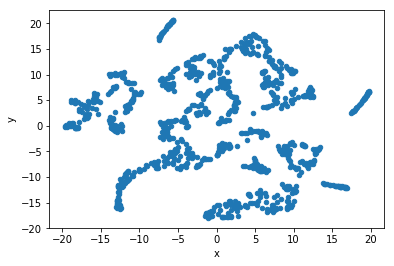

In [88]:
df_tsne2d = pd.DataFrame(tsne.embedding_, columns=list('xy'))
df_tsne2d.plot.scatter(x='x', y='y')
plt.show()

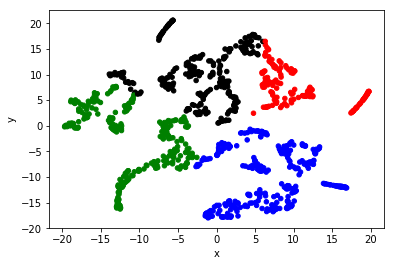

In [102]:
kmeans = KMeans(init='k-means++', n_clusters=4)
kmeans = kmeans.fit(df_tsne2d[['x','y']])
df_tsne2d['tsnefit'] = kmeans.predict(df_tsne2d)
colors = np.array(list('rgbkcmyr'))[df2d.tsnefit.values]
df_tsne2d.plot.scatter(x='x', y='y', c=colors)
plt.show()

Index(['x', 'y', 'cluster_id'], dtype='object')